<a href="https://colab.research.google.com/github/yweslakarep123/USA-House-Prices-pred/blob/main/USA_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [7]:
!chmod 600 /content/kaggle.json

In [8]:
!kaggle datasets download -d fratzcan/usa-house-prices

Dataset URL: https://www.kaggle.com/datasets/fratzcan/usa-house-prices
License(s): Apache 2.0
  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 62.5MB/s]


In [9]:
!pip install patool pyunpack

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 1.1 MB/s eta 0:00:00


In [10]:
from pyunpack import Archive
zip_file_path = '/content/usa-house-prices.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")

Ekstraksi selesai.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
file_path = '/content/drive/MyDrive/Test_dataset/USA Housing Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [14]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [18]:
data["date"] = pd.to_datetime(data["date"])

<Axes: ylabel='price'>

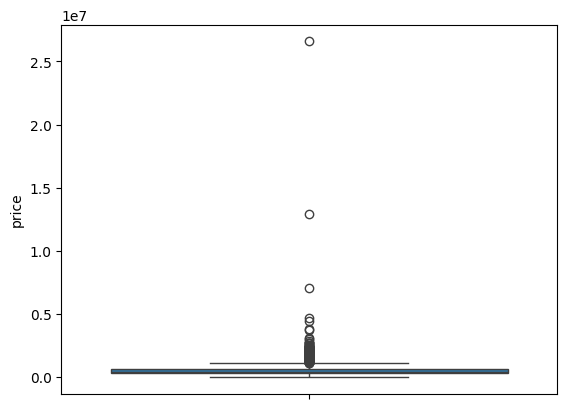

In [19]:
sns.boxplot(data['price'])

In [20]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [22]:
data['date'].unique()

<DatetimeArray>
['2014-05-09 00:00:00', '2014-05-10 00:00:00', '2014-05-11 00:00:00',
 '2014-05-12 00:00:00', '2014-05-13 00:00:00', '2014-05-14 00:00:00',
 '2014-05-15 00:00:00', '2014-05-16 00:00:00', '2014-05-17 00:00:00',
 '2014-05-18 00:00:00', '2014-05-19 00:00:00', '2014-05-20 00:00:00',
 '2014-05-21 00:00:00', '2014-05-22 00:00:00', '2014-05-23 00:00:00',
 '2014-05-24 00:00:00', '2014-05-25 00:00:00', '2014-05-26 00:00:00',
 '2014-05-27 00:00:00', '2014-05-28 00:00:00', '2014-05-29 00:00:00',
 '2014-05-30 00:00:00', '2014-05-31 00:00:00', '2014-06-01 00:00:00',
 '2014-06-02 00:00:00', '2014-06-03 00:00:00', '2014-06-04 00:00:00',
 '2014-06-05 00:00:00', '2014-06-06 00:00:00', '2014-06-07 00:00:00',
 '2014-06-08 00:00:00', '2014-06-09 00:00:00', '2014-06-10 00:00:00',
 '2014-06-11 00:00:00', '2014-06-12 00:00:00', '2014-06-13 00:00:00',
 '2014-06-14 00:00:00', '2014-06-15 00:00:00', '2014-06-16 00:00:00',
 '2014-06-17 00:00:00', '2014-06-18 00:00:00', '2014-06-19 00:00:00',
 '20

In [24]:
data.drop(columns = ["country"], inplace = True)

In [26]:
data['street'].unique()

array(['9245-9249 Fremont Ave N', '33001 NE 24th St', '7070 270th Pl SE',
       ..., '759 Ilwaco Pl NE', '5148 S Creston St', '18717 SE 258th St'],
      dtype=object)

In [27]:
percentile25 = data['price'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = data['price'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_data = data.copy()

# Capping the outliers
new_data['price'] = np.where(
    new_data['price'] > uplimit, uplimit,
    np.where(new_data['price'] < lolimit, lolimit, new_data['price'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_data.head())

25th Percentile: 320000.0
75th Percentile: 659125.0
Upper Limit: 1167812.5 Lower Limit: -188687.5
        date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-09   376000.0       3.0       2.00         1340      1384     3.0   
1 2014-05-09   800000.0       4.0       3.25         3540    159430     2.0   
2 2014-05-09  1167812.5       5.0       6.50         7270    130017     2.0   
3 2014-05-09   324000.0       3.0       2.25          998       904     2.0   
4 2014-05-10   549900.0       5.0       2.75         3060      7015     1.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      2008   
1           0     0          3        3540              0      2007   
2           0     0          3        6420            850      2010   
3           0     0          3         798            200      2007   
4           0     0          5        1600           1460      1979   



In [28]:
data = new_data.copy()

<Axes: ylabel='price'>

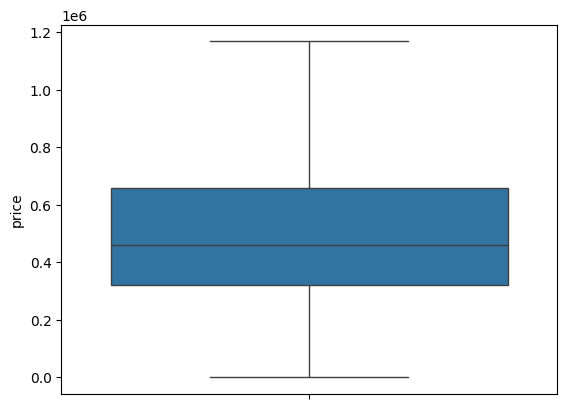

In [30]:
sns.boxplot(data['price'])

In [33]:
data.drop('date', axis=1, inplace=True)

In [34]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014
2,1167812.5,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4140 non-null   float64
 1   bedrooms       4140 non-null   float64
 2   bathrooms      4140 non-null   float64
 3   sqft_living    4140 non-null   int64  
 4   sqft_lot       4140 non-null   int64  
 5   floors         4140 non-null   float64
 6   waterfront     4140 non-null   int64  
 7   view           4140 non-null   int64  
 8   condition      4140 non-null   int64  
 9   sqft_above     4140 non-null   int64  
 10  sqft_basement  4140 non-null   int64  
 11  yr_built       4140 non-null   int64  
 12  yr_renovated   4140 non-null   int64  
 13  street         4140 non-null   object 
 14  city           4140 non-null   object 
 15  statezip       4140 non-null   object 
dtypes: float64(4), int64(9), object(3)
memory usage: 517.6+ KB


In [68]:
data.drop('street', axis=1, inplace=True)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4140 non-null   float64
 1   bedrooms       4140 non-null   float64
 2   bathrooms      4140 non-null   float64
 3   sqft_living    4140 non-null   int64  
 4   sqft_lot       4140 non-null   int64  
 5   floors         4140 non-null   float64
 6   waterfront     4140 non-null   int64  
 7   view           4140 non-null   int64  
 8   condition      4140 non-null   int64  
 9   sqft_above     4140 non-null   int64  
 10  sqft_basement  4140 non-null   int64  
 11  yr_built       4140 non-null   int64  
 12  yr_renovated   4140 non-null   int64  
 13  city           4140 non-null   object 
 14  statezip       4140 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 485.3+ KB


In [71]:
X = data.drop('price', axis=1)
y = data['price']

In [146]:
categorical_cols = X.select_dtypes(include='object').columns

In [73]:
for i, col in enumerate(categorical_cols):
    print(f"Categorical column {i}: {col}")

Categorical column 0: city
Categorical column 1: statezip


In [138]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep remaining columns as they are
)

# Create a pipeline that includes scaling and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0, random_state=42))
])

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['city', 'statezip'], dtype='object'))])),
                ('scaler', StandardScaler()),
                ('model', Ridge(random_state=42))])

In [141]:
y_pred = pipeline.predict(X_test)

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 22057295918.642273
Mean Absolute Error: 90010.98613542404
Root Mean Squared Error: 148516.9886532927
R-squared: 0.6781762383075959
